## Supervised Machine Learning
### Task 2:  Predict the percentage of an student based on the no. of study hours.

### Created by Pooja Patel

#### Data can be found here http://bit.ly/w-data

#### Que: What will be predicted score if a student studies for 9.25 hrs/ day?

## 1. Importing necessary Libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

%matplotlib inline

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading data from link
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student_df=pd.read_csv(url)
print("Student data is importes successfully")
student_df

Student data is importes successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking if there is any null values in dataset
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Here, there is no null values persent in the dataset, So **data cleaning is not required.**

### Lets look at statistical summary and other information about student dataset.

In [4]:
# Statistical summary of student dataset
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Information of dataset
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 2. Data Visualization

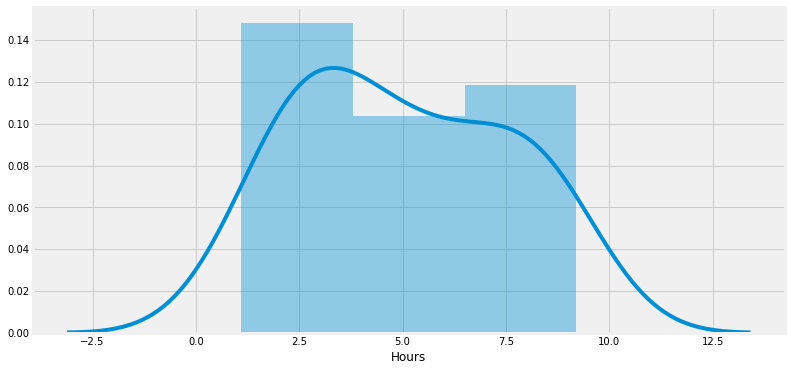

In [6]:
# Distribution of Hours colum
plt.figure(figsize=(12,6))
sns.distplot(student_df['Hours'])

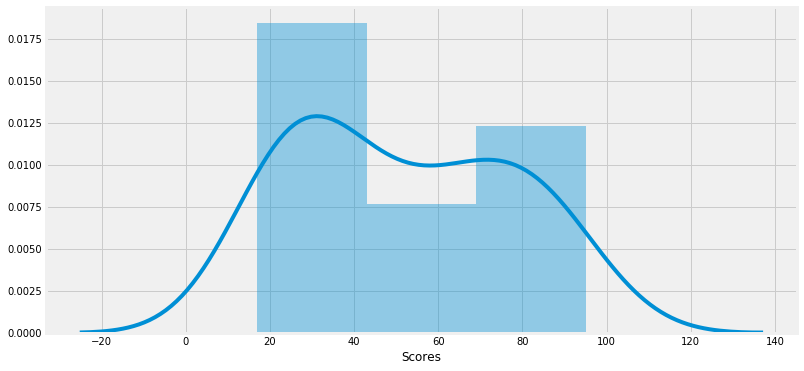

In [7]:
# Distribution of Scores colum
plt.figure(figsize=(12,6))
sns.distplot(student_df['Scores'])

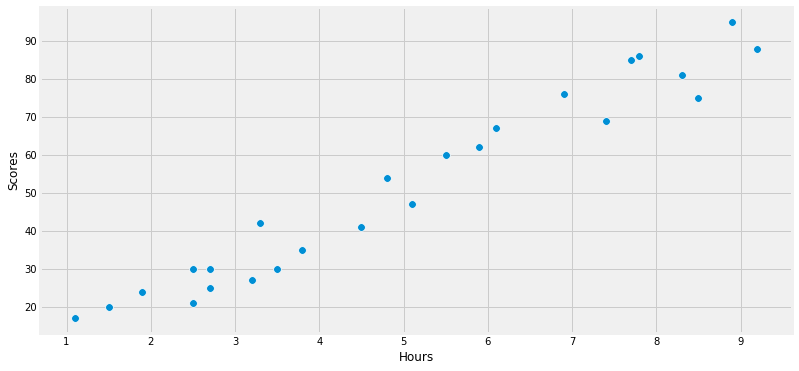

In [8]:
# Plotting the distribution of scores and hours features
plt.figure(figsize=(12,6))
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
sns.scatterplot(x='Hours',y='Scores',data=student_df,s=60)

### From the above graph we can see that it follows the linear trend, Lets use Linear Regression Algorithm. 

### Preparing the data

In [9]:
# Extracting Independent and dependent Variable  
X= student_df.drop('Scores',axis=1)
y=student_df['Scores'].values

In [10]:
# Splitting the dataset into training and test set.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

## 3. Training the Algorithm

In [11]:
# Defining the linear reression algorithm
lr_model = LinearRegression()
# Fitting the training data
lr_model.fit(X_train,y_train)
print("Training complete.")

Training complete.


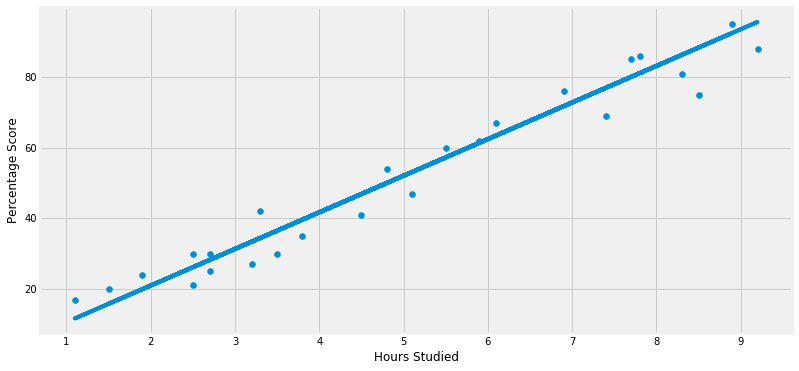

In [12]:
# Plotting the regression line
line = lr_model.coef_*X+lr_model.intercept_

# Plotting for the test data
plt.figure(figsize=(12,6))
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## 4. Making Prediction

In [13]:
# Predicting the test set result  
pred= lr_model.predict(X_test)

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
0,17,11.634316
1,21,26.146707
2,24,19.927111
3,88,95.598862
4,76,71.757077
5,25,28.219905
6,75,88.342666
7,30,26.146707
8,41,46.878693


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
print("No. of Hours 9.25")
pre=lr_model.predict(np.array([[9.25]]))
print('Predicted Score is:',np.round(pre[0],2))

No. of Hours 9.25
Predicted Score is: 96.12


#### Here, If a student studies for 9.25 hrs/day, then the student will get 96.12 (predicted) score. 

## 5. Evaluating the model

In [16]:
# Calculating the error between actual and predicted set
# evaluating the performance of model
print('mean_absolute_error:: ',mean_absolute_error(y_test,pred))
print("mean_squared_error:: ",mean_squared_error(y_test,pred))
print("root mean_squared_error:: ",np.sqrt(mean_squared_error(y_test,pred)))
print("r2_score:: ",r2_score(y_test,pred))

mean_absolute_error::  5.857958085962128
mean_squared_error::  42.82379041388482
root mean_squared_error::  6.5439888763570515
r2_score::  0.9372789124923212
